In [1]:
#Instalamos la librería que vamos a necesitar para abrir el archivo dta
!pip install pyreadstat
%pip install pyod
%pip install openpyxl
# Primero importamos las librerías necesarias para leer y manipular la base de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyreadstat as prs


Note: you may need to restart the kernel to use updated packages.



In [2]:
# Abrimos la carpeta donde se encuentran las bases de datos
#os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP3")
# Guardamos las bases de datos en en dos variables
ind_2004, meta = prs.read_dta("Individual_t104.dta")

ind_2024 = pd.read_excel("usu_individual_T124.xlsx")

Para poder trabajar con ambas bases de datos es necesario primero pasar el nombre de todas las columnas a minúscula. Esto nos permitirá luego concatenar las bases de datos en una sola y preservar la estructura de la información.

In [3]:
# En la base de datos del 2024 los nombres de las columnas están en mayúsculas.
# Entonces, cambiamos los nombres de las columnas a minúsculas.
ind_2024.columns = ind_2024.columns.str.lower()
#ind_2024.head()

#Just in case, hacemos lo mismo para la base del 2004.
ind_2004.columns = ind_2004.columns.str.lower()
ind_2004.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


a. Eliminen todas las observaciones que no corresponden a los
aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos
Aires, y unan ambos trimestres en una sola base.

In [4]:
# Contar el número de filas en el dataframe ind_2004 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33 = ind_2004[ind_2004['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2004 es: {count_32_33}")
# Contar el número de filas en el dataframe ind_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33 = ind_2024[ind_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2024 es: {count_32_33}")

El número de filas con aglomerado 32 y 33 para el año 2004 es: 7647
El número de filas con aglomerado 32 y 33 para el año 2024 es: 7051


In [6]:
# Primero filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
#aglomerados_deseados = ['Ciudad Autónoma de Buenos Aires', 'Gran Buenos Aires']
ind_2004 = ind_2004[ind_2004['aglomerado'].isin([32, 33])]
ind_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])]


# Luego unimos ambos trimestres en una sola bases de datos
unificado = pd.concat([ind_2004, ind_2024], ignore_index=True)
# Y eliminamos las columnas que se encuentran solo en la base de datos del 2004.
unificado = unificado.drop(columns=["ch05","imputa","pondiio","pondii","pondih"])
print("Número de filas en df_unificado es: ", unificado.shape[0])

Número de filas en df_unificado es:  14698


In [ ]:
# Guardar el DataFrame df_unificado en un archivo Excel
unificado.to_excel("df_unificado.xlsx", index=False)
print("El archivo se ha guardado en el directorio actual.")

El archivo se ha guardado en el directorio actual.


b. Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [11]:
# Dado que la estadística descriptiva y la predicción se va a realizar solo con las variables de CH04, CH06, CH07, CH08, NIVEL ED,
# ESTADO, CAT_INAC, IPCF, nos quedamos solo con esas variables.
df_unificado = unificado[['ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
df_unificado.head()

,ano4,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf
0,2004.0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0
1,2004.0,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0
2,2004.0,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0
3,2004.0,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5
4,2004.0,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5


In [12]:
# Primero, vamos a ver si hay valores negativos en las variables ch06 e ipcf.
print("Cantidad de valores negativos en ch06: ", df_unificado[df_unificado['ch06'] < 0].shape[0])
print("Cantidad de valores negativos en ipcf: ", df_unificado[df_unificado['ipcf'] < 0].shape[0])

#Eliminamos los valores negativos de las variables ch06 e ipcf.
df_unificado = df_unificado[df_unificado['ch06'] >= 0]
print("Número de filas en df_unificado luego de eliminar los valores negativos de edad es: ", df_unificado.shape[0])

Cantidad de valores negativos en ch06:  182
Cantidad de valores negativos en ipcf:  0
Número de filas en df_unificado luego de eliminar los valores negativos de edad es:  14516


In [13]:
# Luego de eliminar los valores negativos de la variable de edad, queremos saber cuantos NAs hay en cada variable.
# Contar el número de NAs por fila en el dataframe df_unificado
print("Número de NAs en cada variable:", df_unificado.isna().sum())
#Como no hay NAs en ninguna de las variables, no es necesario hacer nada más.

Número de NAs en cada variable: ano4        0
ch04        0
ch06        0
ch07        0
ch08        0
nivel_ed    0
estado      0
cat_inac    0
ipcf        0
dtype: int64


c. Una vez hecha esa limpieza, realicen un gráfico de barras
mostrando la composición por sexo para 2004 y 2024. Comenten
los resultados.

Valores en ch04 para 2004: ch04
1.0    3528
2.0    3988
Name: count, dtype: int64
Valores en ch04 para 2024: ch04
1.0    3349
2.0    3651
Name: count, dtype: int64


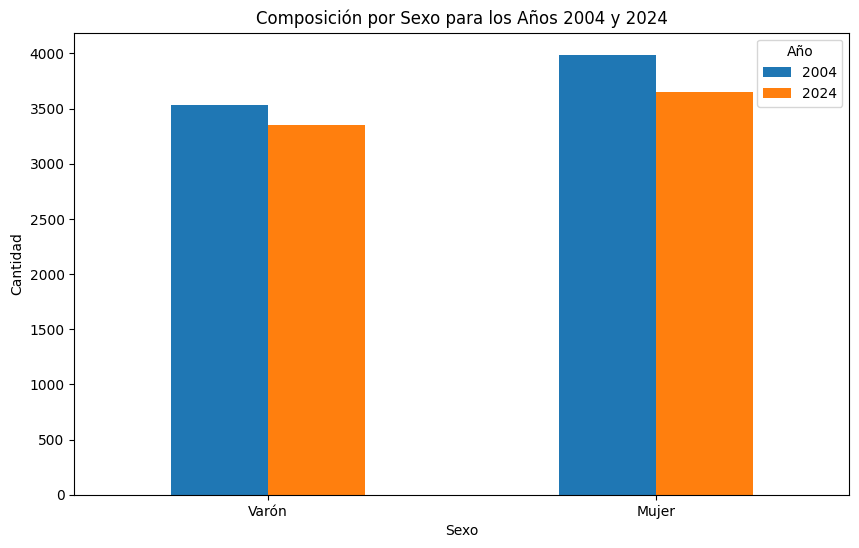

In [14]:
import matplotlib.pyplot as plt

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Contar la cantidad de hombres y mujeres para cada año
sexo_2004 = df_2004['ch04'].value_counts().sort_index()
sexo_2024 = df_2024['ch04'].value_counts().sort_index()

# Verificar los valores en CH04
print("Valores en ch04 para 2004:", sexo_2004)
print("Valores en ch04 para 2024:", sexo_2024)

# Crear un DataFrame con los conteos
sexo_df = pd.DataFrame({
    '2004': sexo_2004,
    '2024': sexo_2024
}, index=[1, 2])

# Renombrar los índices para que sean 'Varón' y 'Mujer'
sexo_df.index = ['Varón', 'Mujer']

# Crear el gráfico de barras
sexo_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por Sexo para los Años 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

d. Realicen una matriz de correlación para 2004 y 2024 con las
siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED,
ESTADO, CAT_INAC, IPCF.

In [15]:
# Antes de realizar las matrices, vamos a renombrar las variables cuyos nombres no son tan obvios.
df_unificado = df_unificado.rename(columns={
    "ch04": "sexo",
    "ch06": "edad",
    "ch07": "estado_civil",
    "ch08": "cobertura_medica",})

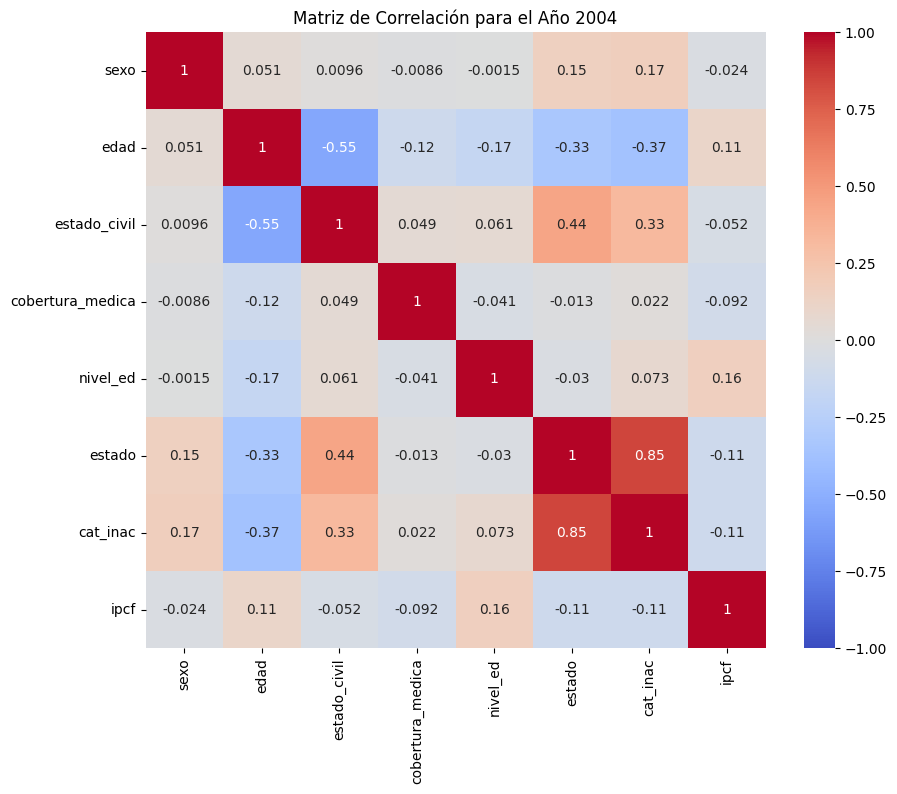

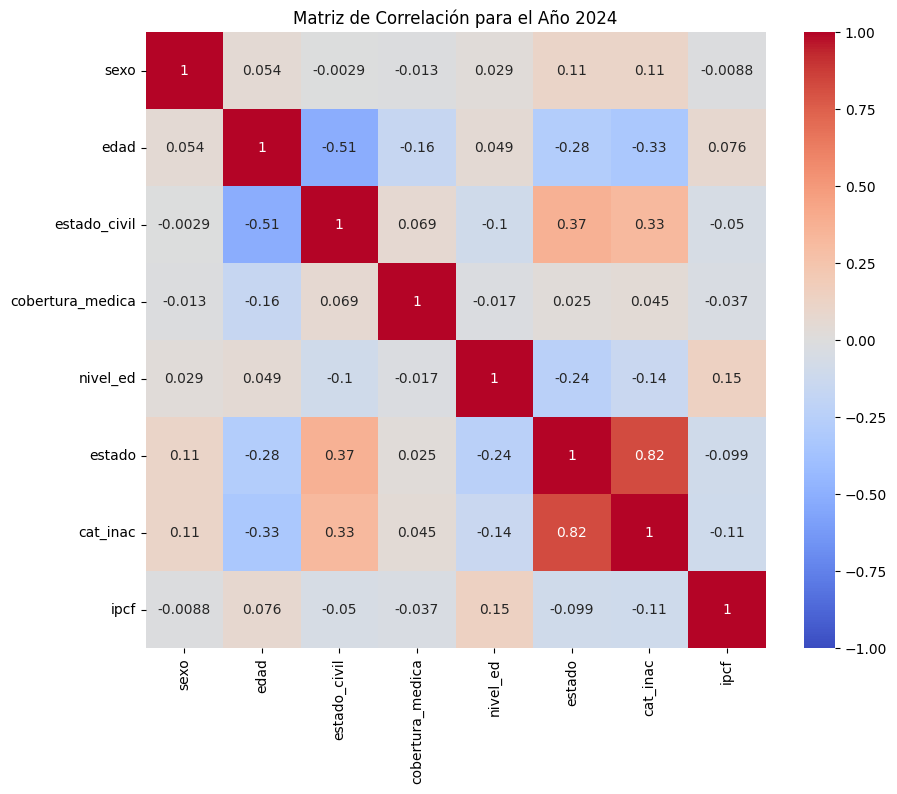

In [16]:

# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Seleccionar las columnas especificadas
variables = ['sexo', 'edad', 'estado_civil', 'cobertura_medica', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
# variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
df_2004_selected = df_2004.loc[:, variables]
df_2024_selected = df_2024.loc[:, variables]

# Calcular la matriz de correlación para cada año
correlation_2004 = df_2004_selected.corr()
correlation_2024 = df_2024_selected.corr()

# Crear un mapa de calor para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2004, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2004')
plt.show()

# Crear un mapa de calor para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2024, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación para el Año 2024')
plt.show()

e. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
¿Cuál es la media de ingreso per cápita familiar (IPCF) según
estado (ocupado, desocupado, inactivo)?

In [17]:
# Filtrar los datos para los años 2004 y 2024
df_2004 = df_unificado[df_unificado['ano4'] == 2004.0]
df_2024 = df_unificado[df_unificado['ano4'] == 2024.0]

# Calcular la media del IPCF para cada estado en 2004
mean_ipcf_2004 = df_2004[df_2004['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Calcular la media del IPCF para cada estado en 2024
mean_ipcf_2024 = df_2024[df_2024['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Crear un DataFrame con los resultados
mean_ipcf = pd.DataFrame({
    '2004': mean_ipcf_2004,
    '2024': mean_ipcf_2024
})

# Renombrar los índices para que sean 'Ocupado', 'Desocupado', 'Inactivo'
state_labels = {1: 'Ocupado', 2: 'Desocupado', 3: 'Inactivo'}
mean_ipcf.index = mean_ipcf.index.map(state_labels)

mean_ipcf


,2004,2024
estado,,
Ocupado,476.064755,207644.844045
Desocupado,224.231970,85019.145466
Inactivo,315.891856,130704.601499


3. Uno de los grandes problemas de la EPH es la creciente cantidad de
hogares que no reportan sus ingresos (ver por ejemplo el siguiente
informe). ¿Cuántas personas no respondieron cuál es su condición de
actividad? Guarden como una base distinta llamada respondieron las
observaciones donde respondieron la pregunta sobre su condición de
actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una
base bajo el nombre norespondieron

In [18]:
# Filtrar las observaciones donde respondieron la pregunta sobre su condición de actividad
respondieron = df_unificado[df_unificado['estado'] != 0]

# Filtrar las observaciones donde no respondieron la pregunta sobre su condición de actividad
norespondieron = df_unificado[df_unificado['estado'] == 0]

# Mostrar la cantidad de personas que no respondieron su condición de actividad
print(f"Cantidad de personas que no respondieron su condición de actividad: {norespondieron.shape[0]}")

# Mostrar las primeras filas de las bases creadas
respondieron.head()
norespondieron.head()

Cantidad de personas que no respondieron su condición de actividad: 51


,ano4,sexo,edad,estado_civil,cobertura_medica,nivel_ed,estado,cat_inac,ipcf
1592,2004.0,1.0,21.0,5.0,3.0,3.0,0.0,0.0,40.0
2208,2004.0,2.0,49.0,4.0,4.0,2.0,0.0,0.0,0.0
2209,2004.0,1.0,24.0,5.0,1.0,3.0,0.0,0.0,0.0
2210,2004.0,2.0,20.0,5.0,4.0,4.0,0.0,0.0,0.0
2479,2004.0,2.0,35.0,3.0,4.0,5.0,0.0,0.0,294.0


4. Agreguen a la base respondieron una columna llamada PEA
(Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la
composición por PEA para 2004 y 2024. Comenten los resultados.


C:\Users\s1290226\AppData\Local\Temp\ipykernel_2464\3534275769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


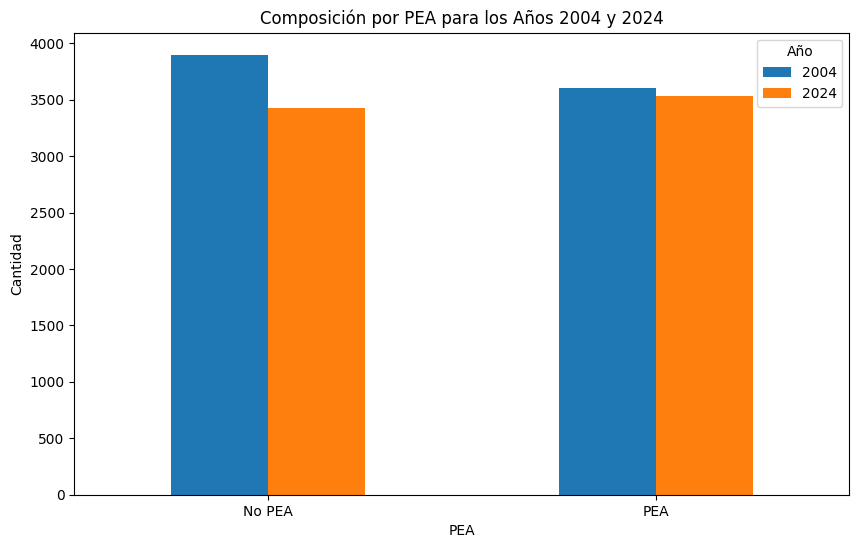

In [19]:
# Agregar la columna PEA (Población Económicamente Activa)
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Filtrar los datos para los años 2004 y 2024
pea_2004 = respondieron[respondieron['ano4'] == 2004.0]['PEA'].value_counts().sort_index()
pea_2024 = respondieron[respondieron['ano4'] == 2024.0]['PEA'].value_counts().sort_index()

# Crear un DataFrame con los conteos
pea_df = pd.DataFrame({
    '2004': pea_2004,
    '2024': pea_2024
}, index=[0, 1])

# Renombrar los índices para que sean 'No PEA' y 'PEA'
pea_df.index = ['No PEA', 'PEA']

# Crear el gráfico de barras
pea_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por PEA para los Años 2004 y 2024')
plt.xlabel('PEA')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

5. Agreguen a la base respondieron una columna llamada PET
(Población en Edad para Trabajar) que tome 1 si están la persona tiene
entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando
la composición por PEA para 2004 y 2024. Comenten los resultados y
compare PET con PEA

C:\Users\s1290226\AppData\Local\Temp\ipykernel_2464\1432567816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


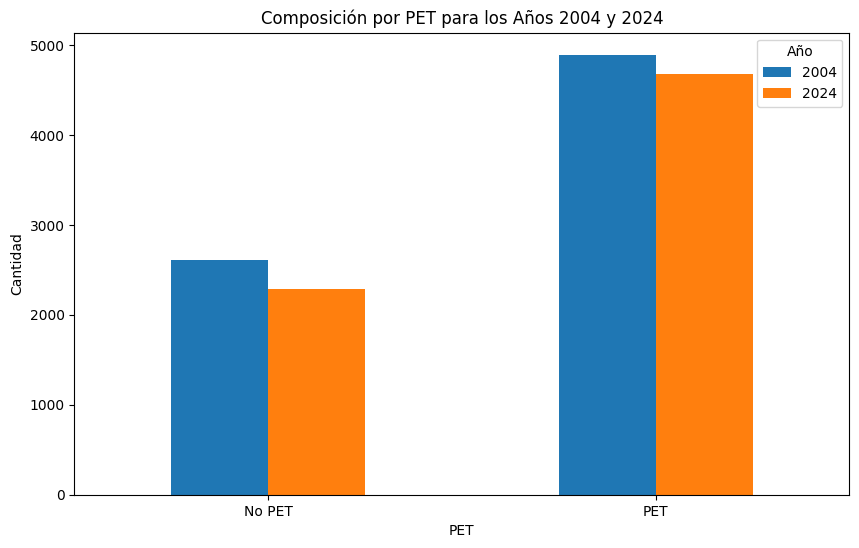

,PEA 2004,PEA 2024,PET 2004,PET 2024
0,3899,3424,2613,2284
1,3607,3535,4893,4675


In [21]:
# Agregar la columna PET (Población en Edad para Trabajar)
respondieron['PET'] = respondieron['edad'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Filtrar los datos para los años 2004 y 2024
pet_2004 = respondieron[respondieron['ano4'] == 2004.0]['PET'].value_counts().sort_index()
pet_2024 = respondieron[respondieron['ano4'] == 2024.0]['PET'].value_counts().sort_index()

# Crear un DataFrame con los conteos
pet_df = pd.DataFrame({
    '2004': pet_2004,
    '2024': pet_2024
}, index=[0, 1])

# Renombrar los índices para que sean 'No PET' y 'PET'
pet_df.index = ['No PET', 'PET']

# Crear el gráfico de barras
pet_df.plot(kind='bar', figsize=(10, 6))
plt.title('Composición por PET para los Años 2004 y 2024')
plt.xlabel('PET')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.show()

# Comparar PET con PEA
pea_pet_comparison = pd.DataFrame({
    'PEA 2004': pea_2004,
    'PEA 2024': pea_2024,
    'PET 2004': pet_2004,
    'PET 2024': pet_2024
})

pea_pet_comparison

6. Por ultimo, agreguen la base respondieron una columna llamada
desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [23]:
# Add the column "desocupado" to the dataframe "respondieron"
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

# Count the number of desocupied people in the year 2004
desocupado_2004 = respondieron[(respondieron['ano4'] == 2004.0) & (respondieron['desocupado'] == 1)].shape[0]

# Count the number of desocupied people in the year 2024
desocupado_2024 = respondieron[(respondieron['ano4'] == 2024.0) & (respondieron['desocupado'] == 1)].shape[0]

print(f"Múmero de personas desocupadas en 2004: {desocupado_2004}")
print(f"Número de personas desocupadas en 2024: {desocupado_2024}")

Múmero de personas desocupadas en 2004: 528
Número de personas desocupadas en 2024: 311


C:\Users\s1290226\AppData\Local\Temp\ipykernel_2464\3917740518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


#### Parte II. Clasificación

In [26]:
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

1. Para cada año, partan la base "respondieron" en una base de prueba (test) y una de entrenamiento (train) utilizando el comando
train_test_split. La base de entrenamiento debe comprender el 70%
de los datos, y la semilla a utilizar (random state instance) debe ser 101.
Establezca a "desocupado" como su variable dependiente en la base de
entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1)

In [ ]:
# Primero dividimos la base respondieron en dos bases, una para el año 2004 y otra para el año 2024.
resp_2004 = respondieron[respondieron['ano4'] == 2004.0]
resp_2024 = respondieron[respondieron['ano4'] == 2024.0]

,ano4,sexo,edad,estado_civil,cobertura_medica,nivel_ed,estado,cat_inac,ipcf,PEA,PET,desocupado
0,2004.0,1.0,79.0,4.0,1.0,3.0,3.0,1.0,368.0,0,0,0
1,2004.0,2.0,67.0,3.0,4.0,2.0,1.0,0.0,0.0,1,0,0
2,2004.0,2.0,74.0,4.0,1.0,2.0,3.0,1.0,440.0,0,0,0
3,2004.0,1.0,54.0,2.0,2.0,2.0,1.0,0.0,532.5,1,1,0
4,2004.0,2.0,51.0,2.0,2.0,6.0,3.0,4.0,532.5,0,1,0


In [28]:
# Entrenaremos con el 70% de la base de datos del 2004 y el resto se usarán para testear el modelo obtenido
train2004, test2004 = train_test_split(resp_2004, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_train_2004 = train2004['desocupado']
X_train_2004 = train2004.drop(columns=['desocupado'])

y_test_2004 = test2004['desocupado']
X_test_2004 = test2004.drop(columns=['desocupado'])

# Agregamos una columna de unos a X_train y X_test
X_train_2004 = X_train_2004.assign(intercept=1)
X_test_2004 = X_test_2004.assign(intercept=1)

# Repito lo mismo para el 2024
train2024, test2024 = train_test_split(resp_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_test_2024 = test2024['desocupado']
X_test_2024 = test2024.drop(columns=['desocupado'])

y_train_2024 = train2024['desocupado']
X_train_2024 = train2024.drop(columns=['desocupado'])

# Agregamos una columna de unos a X_train y X_test
X_train_2024 = X_train_2024.assign(intercept=1)
X_test_2024 = X_test_2024.assign(intercept=1)

2. Implementen los siguientes métodos reportando luego la matriz de
confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno:
- Regresión logística

In [33]:
# Primero realizamos la regresión logística para el 2004
# Ajustamos el clasificador con el metodo fit() 
log_reg_2004 = LogisticRegression(penalty=None).fit(X_train_2004, y_train_2004)

# Y predecimos la variable dependiente para el 2004
y_test_pred_score_2004 = log_reg_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_2004 = log_reg_2004.predict(X_test_2004)

# Calculamos la matriz de confusión
conf_matrix_log_2004 = confusion_matrix(y_test_2004, y_test_pred_2004)

# Calculamos AUC y ROC
auc_log_2004 = roc_auc_score(y_test_2004, y_test_pred_score_2004)
print('AUC de la regresión logística para los datos del 2004: %.4f' % auc_log_2004)
fpr_log_2004, tpr_log_2004, thresholds_log_2004 = roc_curve(y_test_2004, y_test_pred_score_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_log_2004)
print('FPR:', fpr_log_2004)
print('TPR:', tpr_log_2004)

AUC de la regresión logística para los datos del 2004: 0.9988
Thresholds: [           inf 9.99999221e-01 9.99999221e-01 ... 5.87168400e-54
 9.40953438e-55 3.07000339e-55]
FPR: [0.         0.         0.         ... 0.99904626 0.99952313 1.        ]
TPR: [0.         0.00645161 0.01290323 ... 1.         1.         1.        ]


c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Análisis discriminante lineal

- KNN con k=3

- Naive Bayes